# Linear regression

Let us make a linear regression model. 




## Implementation of Linear Regression Without using any library 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

First, we will read the dataset file saved as a csv file with the help of pandas.

In [ ]:
df = pd.read_csv("bottle.csv")
df.shape

(4204, 74)

Now, we will create a mask to remove the rows of the dataframe which do not contain any entries for Salinity and Temperature column.

In [ ]:
df = df[df['Salnty'].isnull() == False]
df = df[df['T_degC'].isnull() == False]

The below step is for checking if there are any null entries for the Salinity column.

In [ ]:
df['Salnty'].isnull().sum()

0

In [ ]:
salin_data = df.Salnty
temp_data = df.T_degC
salin_data = salin_data[:1000]
temp_data = temp_data[:1000]

In [ ]:
# initializing the variables and parameters
A,B = 0,0
no_of_epochs = 10000
cnt = 0
batch_size = 1000
loss = []
lr = 0.005
x_data,y_data = [],[]

In [ ]:
for i in range(no_of_epochs):
    salin_pred = A*temp_data + B
    error = (((salin_pred - salin_data)**2).sum())/batch_size
    dA = ((2*temp_data*(salin_data - salin_pred)).sum())/batch_size
    dB = ((2*(salin_data - salin_pred)).sum())/batch_size
    A = A + dA*lr 
    B = B + dB*lr
    loss = loss + [error]
    print("After {} th epoch, the error is ".format(i+1),error)

Streaming output truncated to the last 5000 lines.
After 5001 th epoch, the error is  0.07147576085957622
After 5002 th epoch, the error is  0.07147435132599943
After 5003 th epoch, the error is  0.07147294530837325
After 5004 th epoch, the error is  0.07147154279792743
After 5005 th epoch, the error is  0.07147014378591386
After 5006 th epoch, the error is  0.0714687482636057
After 5007 th epoch, the error is  0.07146735622229844
After 5008 th epoch, the error is  0.07146596765330886
After 5009 th epoch, the error is  0.07146458254797566
After 5010 th epoch, the error is  0.07146320089765909
After 5011 th epoch, the error is  0.071461822693741
After 5012 th epoch, the error is  0.0714604479276247
After 5013 th epoch, the error is  0.07145907659073478
After 5014 th epoch, the error is  0.0714577086745174
After 5015 th epoch, the error is  0.07145634417043993
After 5016 th epoch, the error is  0.0714549830699912
After 5017 th epoch, the error is  0.07145362536468107
After 5018 th epoch,

Now, we will see the performance of the model  by comparing the data-points of the model and the linear fit provided by the model visually with the help of graph.

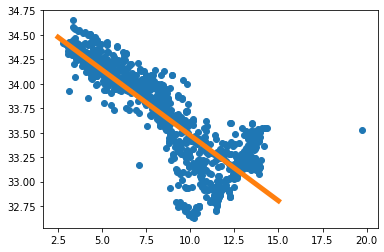

In [ ]:
x = np.linspace(2.5,15,20)
y = x * A + B
plt.plot(temp_data[:1000],salin_data[:1000],'o')
plt.plot(x,y,linewidth = 5)

plt.show()


## Implementation of Linear Regression using Pytorch

As we have implemented naive Linear regression, now we will try to implement linear regression using Pytorch module.


In [ ]:
from torch import nn
import torch.autograd as autograd
from torch.utils.data import DataLoader,Dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

We are defining the linear regression model in terms of Input size and Output size variable both of which we will set to 1 for this case of simple linear regression.
 

In [ ]:
# defining the Linear regression model

class Linear_Regression(nn.Module):
  def __init__(self):
    super(Linear_Regression,self).__init__()
    self.linear = nn.Linear(1,1)
  def forward(self, x):
    output = self.linear(x)
    return output

In [ ]:
# fixing hyperparameters and making an instance of the model 
lr = 0.0008
epochs = 1000
batch_size = 10000
lin_model = Linear_Regression()

In [ ]:
# making a custom dataset containing the information about salinity and temperature.

class custom_dataset(Dataset):
  def __init__(self, saln, temp):
    self.saln = saln
    self.temp = temp
  def __len__(self):
    return len(self.saln)
  
  def __getitem__(self,idx):
    return self.saln[idx],self.temp[idx]

In [ ]:
df = pd.read_csv("bottle.csv")

salinity = torch.tensor(df['Salnty'][:10000])
temp = torch.tensor(df['T_degC'][:10000])

dataset = custom_dataset(salinity, temp)
data_loader = DataLoader(dataset,batch_size, shuffle = True)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(lin_model.parameters(),lr,momentum = 0.9)


In [ ]:
lin_model.train()
for epoch in range(epochs):
  for batch_idx,(x_value, y_value) in enumerate(data_loader) :
    optimizer.zero_grad()
    mask = (~x_value.isnan()).logical_and(~y_value.isnan())
    x_value = torch.masked_select(x_value, mask)
    y_value = torch.masked_select(y_value, mask)
    x_value = x_value[:,None].float()
    y_value = y_value[:,None].float()
    output = lin_model.forward(x_value)
    loss_ = loss(output, y_value)
    print("For {}th epoch and {}th batch, the error is {}".format(epoch+1,batch_idx+1,loss_))
    loss_.backward()
    optimizer.step()
    if loss_ < 1:
      break
  if loss_ < 1:
      break

For 1th epoch and 1th batch, the error is 83.91364288330078
For 2th epoch and 1th batch, the error is 63.169490814208984
For 3th epoch and 1th batch, the error is 78.2315673828125
For 4th epoch and 1th batch, the error is 48.0300407409668
For 5th epoch and 1th batch, the error is 72.08477020263672
For 6th epoch and 1th batch, the error is 37.1920166015625
For 7th epoch and 1th batch, the error is 65.79869842529297
For 8th epoch and 1th batch, the error is 29.605571746826172
For 9th epoch and 1th batch, the error is 59.624755859375
For 10th epoch and 1th batch, the error is 24.437746047973633
For 11th epoch and 1th batch, the error is 53.746273040771484
For 12th epoch and 1th batch, the error is 21.03600311279297
For 13th epoch and 1th batch, the error is 48.287837982177734
For 14th epoch and 1th batch, the error is 18.896451950073242
For 15th epoch and 1th batch, the error is 43.324954986572266
For 16th epoch and 1th batch, the error is 17.63649559020996
For 17th epoch and 1th batch, t

In [ ]:
bias = lin_model(torch.tensor([0]).float())
weight = lin_model(torch.tensor([1]).float()) - bias
x_val = np.linspace(0,20,10)
y_val = x_val*(weight.detach().numpy()) + bias.detach().numpy()
print(bias,weight)
print(lin_model.parameters)

tensor([0.6097], grad_fn=<AddBackward0>) tensor([0.2458], grad_fn=<SubBackward0>)
<bound method Module.parameters of Linear_Regression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>


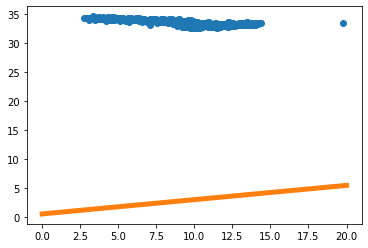

In [ ]:
plt.plot(df['T_degC'][:1000],df['Salnty'][:1000],'o')
plt.plot(x_val,y_val,linewidth = 5)
plt.show()
